# Data ingestion & inspection


### numpy + pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_airport = pd.read_csv('/home/xenakas/Desktop/Git/py_projects/airports/airports.csv', index_col=0, names = ['Airline ID', 'Name', 'City',   'Country' , 'IATA', 'ICAO', 'Latitude' , 'Longitude', 'Altitude' , 'Timezone' , 'DST', 'Tz database time zone',  'Type', 'Source' ])

df_airport.loc[[2,3,7], 'ICAO':'Name':-1] #  from last to first [ <first element to include> : <first element to exclude> : <step> ]

,ICAO,IATA,Country,City,Name
Airline ID,,,,,
2,AYMD,MAG,Papua New Guinea,Madang,Madang Airport
3,AYMH,HGU,Papua New Guinea,Mount Hagen,Mount Hagen Kagamuga Airport
7,BGBW,UAK,Greenland,Narssarssuaq,Narsarsuaq Airport


In [3]:
df_airport.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7184 entries, 1 to 12057
Data columns (total 13 columns):
Name                     7184 non-null object
City                     7140 non-null object
Country                  7184 non-null object
IATA                     7182 non-null object
ICAO                     7184 non-null object
Latitude                 7184 non-null float64
Longitude                7184 non-null float64
Altitude                 7184 non-null int64
Timezone                 7184 non-null object
DST                      7184 non-null object
Tz database time zone    7184 non-null object
Type                     7184 non-null object
Source                   7184 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [4]:
df_airport.info(verbose=True)

np_vals = df_airport.values

[print(x, 'has type', type(eval(x))) for x in ['df_airport', 'np_vals'] ]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7184 entries, 1 to 12057
Data columns (total 13 columns):
Name                     7184 non-null object
City                     7140 non-null object
Country                  7184 non-null object
IATA                     7182 non-null object
ICAO                     7184 non-null object
Latitude                 7184 non-null float64
Longitude                7184 non-null float64
Altitude                 7184 non-null int64
Timezone                 7184 non-null object
DST                      7184 non-null object
Tz database time zone    7184 non-null object
Type                     7184 non-null object
Source                   7184 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB
df_airport has type <class 'pandas.core.frame.DataFrame'>
np_vals has type <class 'numpy.ndarray'>


[None, None]

### Zip

Your job is to use these lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the list(), zip(), dict() and pd.DataFrame() functions. 

In [5]:
list_keys =   ['Country', 'Total']
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]
df = pd.DataFrame(dict(list(zip(list_keys, list_values))))
df

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### broadcasting

In [6]:
state = 'PA'
cities = ['Manheim',  'Preston park',  'Biglerville',  'Indiana',  'Curwensville',  'Crown',  'Harveys lake',  'Mineral springs', 'Cassville',
 'Hannastown',  'Saltsburg', 'Tunkhannock', 'Pittsburgh', 'Lemasters', 'Great bend']

data = {'state':state, 'city':cities} # Construct a dictionary: data
df2 =  pd.DataFrame(data)

df2

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


### plotting

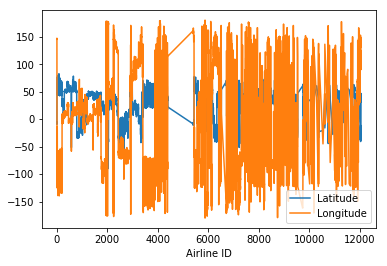

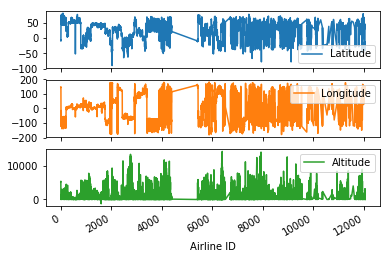

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

df_airport[['Latitude' , 'Longitude'  ]].plot()
#plt.yscale('log')
plt.savefig('df.png') #.jpg, .pdf
plt.show()

df_airport.plot(subplots=True)
#plt.yscale('log')
plt.savefig('df.png') #.jpg, .pdf
plt.show()

## Exploratory data analysis

In [8]:
from sklearn import datasets

iris = datasets.load_iris()


In [9]:
df_iris = pd.DataFrame(iris.data)

df_iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

df_iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


In [10]:
print(df_iris.shape)

(150, 4)


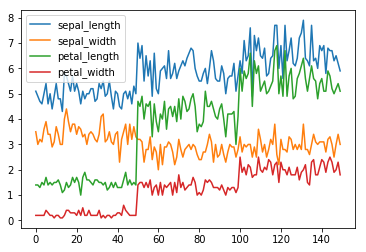

In [11]:
df_iris.plot()
plt.show()

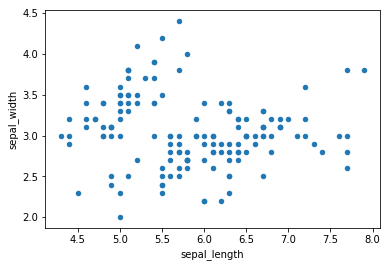

In [12]:
df_iris.plot(x='sepal_length', y ='sepal_width', kind = 'scatter')

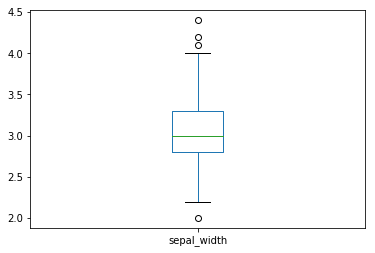

In [13]:
df_iris.plot(x='sepal_length', y ='sepal_width', kind = 'box')

/home/xenakas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


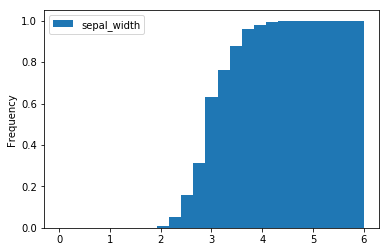

In [14]:
df_iris.plot(x='sepal_length', y ='sepal_width', kind = 'hist', bins = 25, normed = True, range = (0,6), cumulative = True)

In [15]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal_length       AxesSubplot(0.125,0.125;0.352273x0.755)
sepal_width     AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

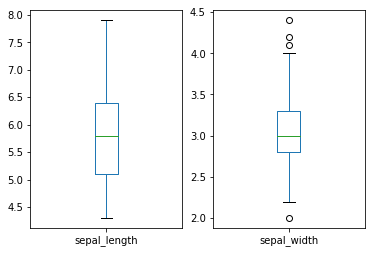

In [16]:
df_iris[['sepal_length', 'sepal_width']].plot(subplots=True, kind='box')

In [17]:
import seaborn as sns

df_tips = sns.load_dataset("tips")


df_tips.head(4)



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


/home/xenakas/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


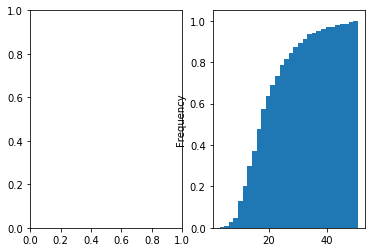

In [18]:
fig, axes = plt.subplots(1, 2)


# Plot the PDF
#df_tips.total_bill.plot(ax=axes[0], kind='hist', bins=30,  normed=True)
#plt.show()

# Plot the CDF
df_tips.total_bill.plot(ax=axes[1], kind='hist', bins=30, cumulative=True, normed=True)
plt.show()



In [19]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
df_iris.quantile([0.025, 0.975])

,sepal_length,sepal_width,petal_length,petal_width
0.025,4.4725,2.2725,1.2725,0.1
0.975,7.7000,3.9275,6.4550,2.4


In [21]:
df_iris['species'] = iris['target']

setosa = df_iris[df_iris['species'] == 0]
versicolor = df_iris[df_iris['species'] == 1]
virginica = df_iris[df_iris['species'] == 2]
del setosa['species'], versicolor['species'], virginica['species']

virginica.head(3)

,sepal_length,sepal_width,petal_length,petal_width
100,6.3,3.3,6.0,2.5
101,5.8,2.7,5.1,1.9
102,7.1,3.0,5.9,2.1


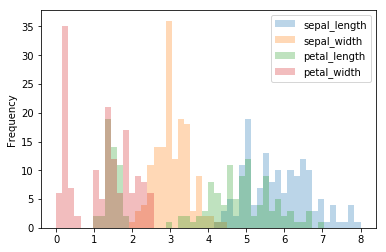

In [22]:
%matplotlib inline

df_iris.iloc[:, 0:4].plot(kind='hist',bins = 50, range=(0,8), alpha=0.3)

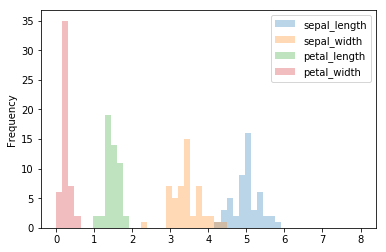

In [23]:
setosa.plot(kind='hist',bins = 50, range=(0,8), alpha=0.3)

In [24]:
versicolor.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


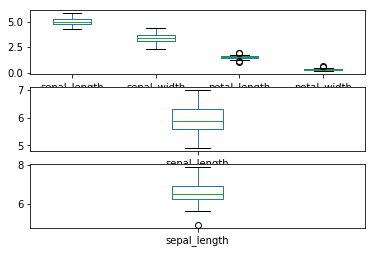

In [25]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
setosa.plot(ax=axes[0], kind='box')

# Generate a box plot of the fare prices for the Second passenger class
versicolor.plot(ax=axes[1], y='sepal_length', kind='box')

# Generate a box plot of the fare prices for the Third passenger class
virginica.plot(ax=axes[2], y='sepal_length', kind='box')

# Display the plot
plt.show()

## Time series

In [26]:
from vega_datasets import data

In [27]:
sf_temps = data.sf_temps()

sf_temps['date'] = pd.to_datetime(sf_temps['date'],  format='%Y-%m-%d %H:%M' )

sf_temps.set_index('date', inplace=True)

sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [28]:
sf_temps.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 1 columns):
temp    8759 non-null float64
dtypes: float64(1)
memory usage: 136.9 KB


In [29]:
(sf_temps.loc['2010-12-01'] == sf_temps.loc['December 1, 2010']).head(2)

,temp
date,
2010-12-01 00:00:00,True
2010-12-01 01:00:00,True


### resampling

#### downsampling: reduce datetime rows to slower frequency

In [30]:
sf_temps.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [31]:
sf_temps.resample('M').mean()

,temp
date,
2010-01-31,49.984140
2010-02-28,52.243899
2010-03-31,53.956528
2010-04-30,55.633056
2010-05-31,57.970968
2010-06-30,60.444722
2010-07-31,61.765457
2010-08-31,62.405376
2010-09-30,62.487083


In [32]:
sf_temps.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

In [33]:
sf_temps.resample('Q').std()

,temp
date,
2010-03-31,3.603509
2010-06-30,5.024696
2010-09-30,4.940399
2010-12-31,5.561749


In [34]:
sf_temps.resample('B').sum().head(2) # B for business days

,temp
date,
2010-01-01,3548.8
2010-01-04,1186.7


In [35]:
sf_temps.resample('38B').sum()

,temp
date,
2010-01-01,65944.3
2010-02-24,70245.3
2010-04-19,72240.1
2010-06-10,79591.5
2010-08-03,78009.0
2010-09-24,77009.8
2010-11-17,55558.3


#### upsampling: reduce datetime rows to faster frequency

In [36]:
ts = sf_temps.resample('Q').std()

ts.resample('M').ffill()

,temp
date,
2010-03-31,3.603509
2010-04-30,3.603509
2010-05-31,3.603509
2010-06-30,5.024696
2010-07-31,5.024696
2010-08-31,5.024696
2010-09-30,4.940399
2010-10-31,4.940399
2010-11-30,4.940399


In [37]:
sf_temps.rolling(window=24).mean()[22:29]  # Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends


,temp
date,
2010-01-01 22:00:00,NaN
2010-01-01 23:00:00,49.170833
2010-01-02 00:00:00,49.175000
2010-01-02 01:00:00,49.183333
2010-01-02 02:00:00,49.187500
2010-01-02 03:00:00,49.195833
2010-01-02 04:00:00,49.204167


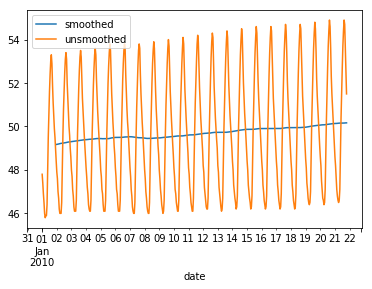

In [38]:
ts = pd.DataFrame({'smoothed':sf_temps.rolling(window=24).mean()['temp'], 'unsmoothed':sf_temps['temp']})

ts[0:500].plot()

style format sring
- color: k (black), b, g, r, c
- marker: . (dot). o (circle), * (star), s(square), + (plus)
- line type: -  (solid), : (dotted), -- (dashed)

###  filtering

In [51]:
df_airport.columns = df_airport.columns.str.strip('e') # The characters to be removed from beginning or end of the string.
df_airport.head(2)

,Nam,City,Country,IATA,ICAO,Latitud,Longitud,Altitud,Timezon,DST,Tz database time zon,Typ,Sourc
Airline ID,,,,,,,,,,,,,
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports


In [54]:
aus = df_airport['Country'].str.contains('Australia')
aus.head(2)

Airline ID
1    False
2    False
Name: Country, dtype: bool

In [56]:
df_airport[aus].head(3)

,Nam,City,Country,IATA,ICAO,Latitud,Longitud,Altitud,Timezon,DST,Tz database time zon,Typ,Sourc
Airline ID,,,,,,,,,,,,,
3317,Brisbane Archerfield Airport,Brisbane,Australia,\N,YBAF,-27.570299,153.007996,63,10,O,Australia/Brisbane,airport,OurAirports
3318,Northern Peninsula Airport,Amberley,Australia,ABM,YBAM,-10.950800,142.459000,34,10,O,Australia/Brisbane,airport,OurAirports
3319,Alice Springs Airport,Alice Springs,Australia,ASP,YBAS,-23.806700,133.901993,1789,9.5,N,Australia/Darwin,airport,OurAirports


### missing values and interpolation


In [58]:
ts1 = sf_temps.resample('M').mean()
ts2 = sf_temps.resample('Q').max()

ts2

,temp
date,
2010-03-31,61.3
2010-06-30,69.7
2010-09-30,72.2
2010-12-31,70.6


In [59]:
ts2.reindex(ts1.index)

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,61.3
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,69.7
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,72.2


In [61]:
ts2_interp = ts2.reindex(ts1.index).interpolate(how='linear')
ts2_interp

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,61.300000
2010-04-30,64.100000
2010-05-31,66.900000
2010-06-30,69.700000
2010-07-31,70.533333
2010-08-31,71.366667
2010-09-30,72.200000


In [62]:
np.abs(ts1 - ts2_interp)

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,7.343472
2010-04-30,8.466944
2010-05-31,8.929032
2010-06-30,9.255278
2010-07-31,8.767876
2010-08-31,8.961290
2010-09-30,9.712917
